<a href="https://colab.research.google.com/github/Kartike1919/Kartike007/blob/main/House_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB
None
   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226 

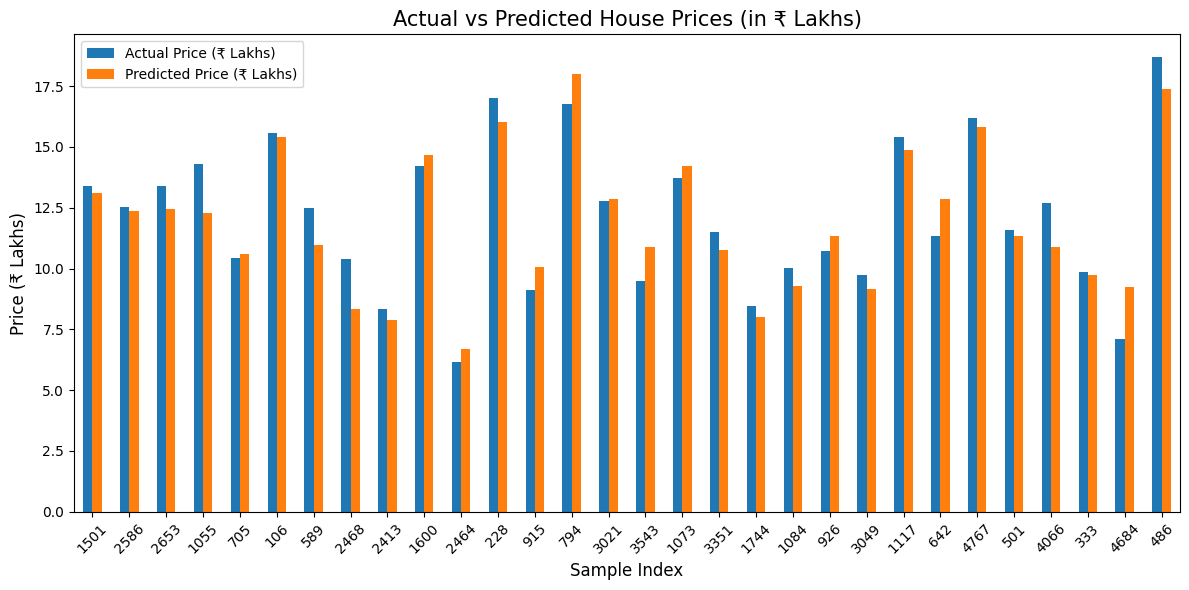

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Step 2: Load Dataset

df = pd.read_csv('/content/Housing.csv')

# Step 3: Drop Address column (non-numeric & not useful for regression)
df.drop('Address', axis=1, inplace=True)

# Step 4: Check Data
print(df.info())
print(df.head())

# Step 5: Check for Missing Values
print(df.isnull().sum())

# Step 6: Define Features and Target
X = df.drop('Price', axis=1)
y = df['Price']

# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 8: Train Model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Step 9: Predict
y_pred = lr.predict(X_test)

# Step 10: Evaluate
print("\nModel Evaluation:")
print("R² Score:", metrics.r2_score(y_test, y_pred))
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Step 11: Actual vs Predicted Prices (in Lakhs)
comparison_df = pd.DataFrame({
    'Actual Price (₹ Lakhs)': y_test / 1e5,
    'Predicted Price (₹ Lakhs)': y_pred / 1e5
}).head(30)

# Step 12: Bar Chart
ax = comparison_df.plot(kind='bar', figsize=(12, 6))
plt.title('Actual vs Predicted House Prices (in ₹ Lakhs)', fontsize=15)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Price (₹ Lakhs)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()